In [911]:
!pip  install numpy
!pip  install matplotlib
!pip  install opencv-python
!pip  install scikit-image
!pip  install scikit-learn

In [912]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

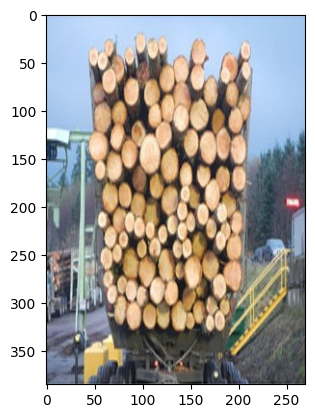

In [913]:
src = cv.imread("task2\logs-1.jpg")
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)
plt.imshow(src)


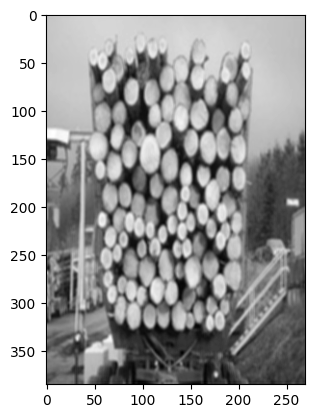

In [914]:
gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)
gray = cv.blur(gray, (3, 3)) # Apply blur with a 3x3 kernel
plt.imshow(gray, 'gray')

In [915]:
detected_circles = cv.HoughCircles(gray,
                   cv.HOUGH_GRADIENT,
                   0.5,  # Inverse ratio of the accumulator resolution to the image resolution
                   15, # Minimum distance between the centers of the detected circles
                   param1 = 300, # The higher threshold of the two passed to the Canny edge detector
                   param2 = 11,  # The accumulator threshold for the circle centers at the detection stage
                   minRadius = 0, maxRadius = 10)

Total logs:  42


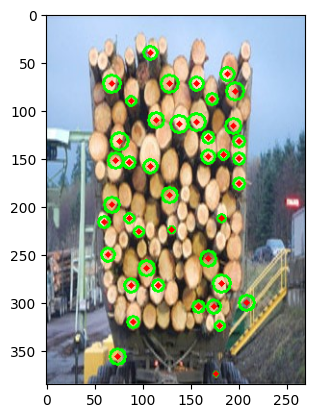

In [916]:
image = src.copy()
logs_count = 0
if detected_circles is not None:
    detected_circles = np.uint16(np.around(detected_circles)) # Convert circle metadata to integers

    for points in detected_circles[0, :]:
        a, b, r = points[0], points[1], points[2]

        cv.circle(image, (a, b), r, (0, 255, 0), 2)

        # Draw a small circle (of radius 1) to show the center.
        cv.circle(image, (a, b), 1, (255, 0, 0), 3)

        logs_count += 1

print("Total logs: ", logs_count)
plt.imshow(image)


In [917]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

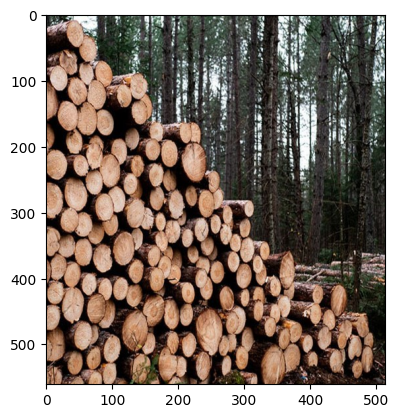

In [918]:
src = cv.imread("task2\logs-2.jpg")
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)
plt.imshow(src)

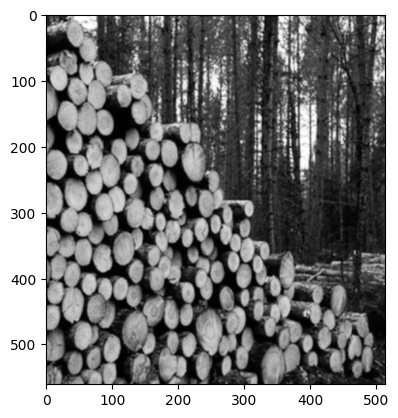

In [919]:
gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)
gray = cv.blur(gray, (3, 3)) # Apply blur with a 3x3 kernel
plt.imshow(gray, 'gray')

In [920]:
detected_circles = cv.HoughCircles(gray,
                   cv.HOUGH_GRADIENT,
                   1,  # Inverse ratio of the accumulator resolution to the image resolution
                   15, # Minimum distance between the centers of the detected circles
                   param1 = 300, # The higher threshold of the two passed to the Canny edge detector
                   param2 = 16,  # The accumulator threshold for the circle centers at the detection stage
                   minRadius = 0, maxRadius = 18)

Total logs:  48


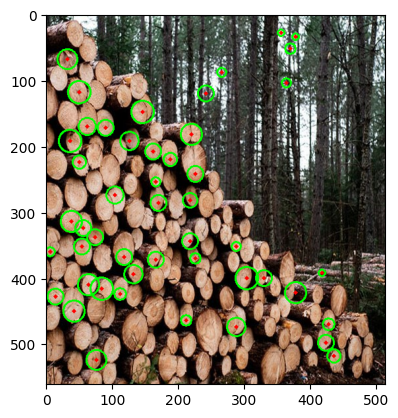

In [921]:
image = src.copy()
logs_count = 0
if detected_circles is not None:
    detected_circles = np.uint16(np.around(detected_circles)) # Convert circle metadata to integers

    for points in detected_circles[0, :]:
        a, b, r = points[0], points[1], points[2]

        cv.circle(image, (a, b), r, (0, 255, 0), 2)

        # Draw a small circle (of radius 1) to show the center.
        cv.circle(image, (a, b), 1, (255, 0, 0), 3)

        logs_count += 1

print("Total logs: ", logs_count)
plt.imshow(image)

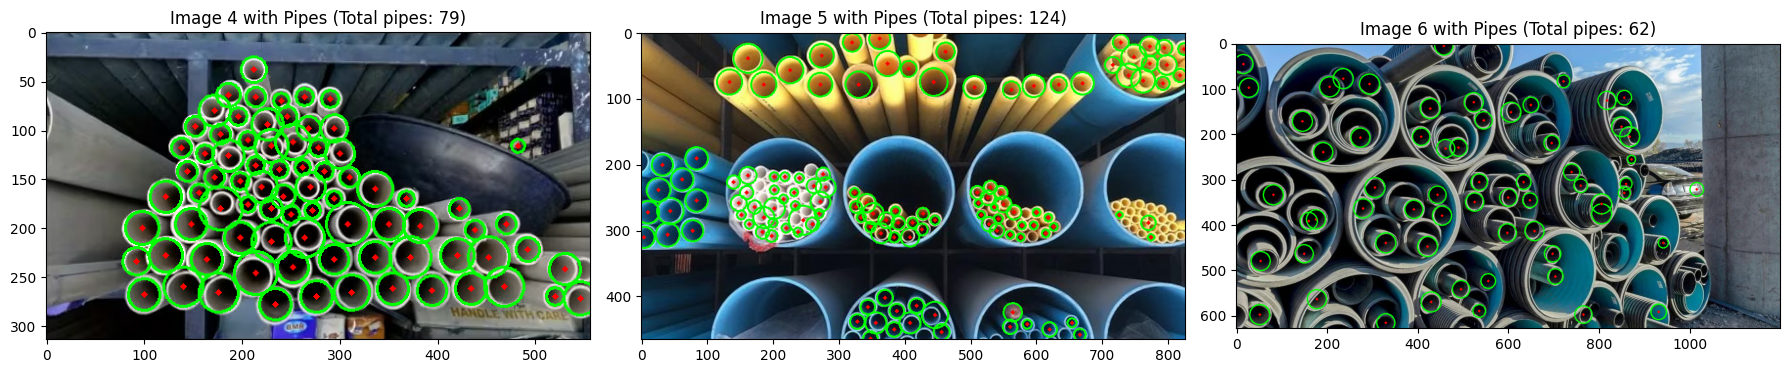

In [922]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def detect_pipes(image):
    gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    gray = cv.medianBlur(gray, 5)  # Apply median blur

    # Use HoughCircles to detect circles
    circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, dp=1, minDist=15,
                               param1=200, param2=20, minRadius=0, maxRadius=23)

    pipes_count = 0

    if circles is not None:
        circles = np.uint16(np.around(circles))
        for circle in circles[0, :]:
            a, b, r = circle[0], circle[1], circle[2]
            cv.circle(image, (a, b), r, (0, 255, 0), 2)
            cv.circle(image, (a, b), 1, (255, 0, 0), 3)
            pipes_count += 1

    return image, pipes_count

# Load the pipes images
src1 = cv.imread("task2/pipes-4.jpg")
src1 = cv.cvtColor(src1, cv.COLOR_BGR2RGB)

src2 = cv.imread("task2/pipes-5.jpg")
src2 = cv.cvtColor(src2, cv.COLOR_BGR2RGB)

src3 = cv.imread("task2/pipes-6.jpg")
src3 = cv.cvtColor(src3, cv.COLOR_BGR2RGB)

# Detect pipes in the image
image4_with_pipes, pipes_count1 = detect_pipes(src1)

image5_with_pipes, pipes_count2 = detect_pipes(src2)

image6_with_pipes, pipes_count3 = detect_pipes(src3)

# Display the results
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(image4_with_pipes)
plt.title(f'Image 4 with Pipes (Total pipes: {pipes_count1})')

plt.subplot(1, 3, 2)
plt.imshow(image5_with_pipes)
plt.title(f'Image 5 with Pipes (Total pipes: {pipes_count2})')

plt.subplot(1, 3, 3)
plt.imshow(image6_with_pipes)
plt.title(f'Image 6 with Pipes (Total pipes: {pipes_count3})')

plt.tight_layout()
plt.show()

